In [1]:
import random_termination
import graph_utilities
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sf = graph_utilities.sf_map()
central_sf = nx.subgraph(sf, nx.strongly_connected_components(sf)[0])

In [3]:
central_sf_caller_locations = list(np.random.choice(central_sf, size=(10,)))
central_sf_caller_probabilities = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [4]:
not_caller = filter(lambda a: a not in central_sf_caller_locations, central_sf.nodes())

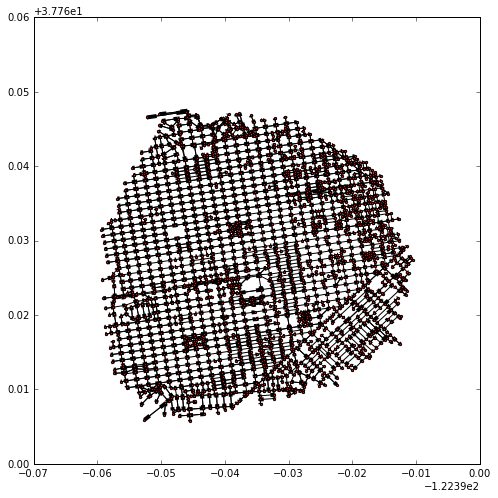

In [5]:
plt.figure(figsize=(8,8))
nx.draw_networkx(
    central_sf,
    pos=nx.get_node_attributes(sf, 'pos'),
    with_labels=False,
    node_size=5)

In [6]:
sf_cost = graph_utilities.graph_cost(
    central_sf, 
    central_sf_caller_locations, 
    central_sf_caller_probabilities, 
    graph_utilities.expected_value)

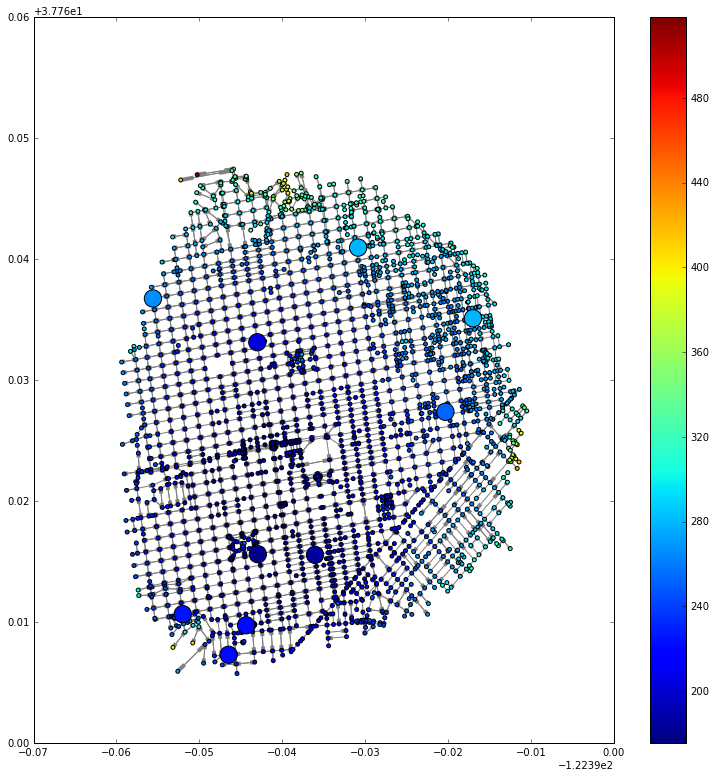

In [7]:
plt.figure(figsize=(13,13))
am = nx.draw_networkx_nodes(
    central_sf,
    pos=nx.get_node_attributes(sf, 'pos'),
    node_color=[sf_cost[n] for n in not_caller],
    with_labels=False,
    nodelist=not_caller,
    node_size=15,
    vmin=min(sf_cost.values()),
    vmax=max(sf_cost.values()))
am = nx.draw_networkx_nodes(
    central_sf,
    pos=nx.get_node_attributes(sf, 'pos'),
    node_color=[sf_cost[n] for n in central_sf_caller_locations],
    with_labels=False,
    nodelist=central_sf_caller_locations,
    node_size=300,
    vmin=min(sf_cost.values()),
    vmax=max(sf_cost.values()))
nx.draw_networkx_edges(
    central_sf,
    pos=nx.get_node_attributes(central_sf, 'pos'),
    arrows=True,
    edge_color="grey")
plt.colorbar(am)

### Doing the continuous call probability

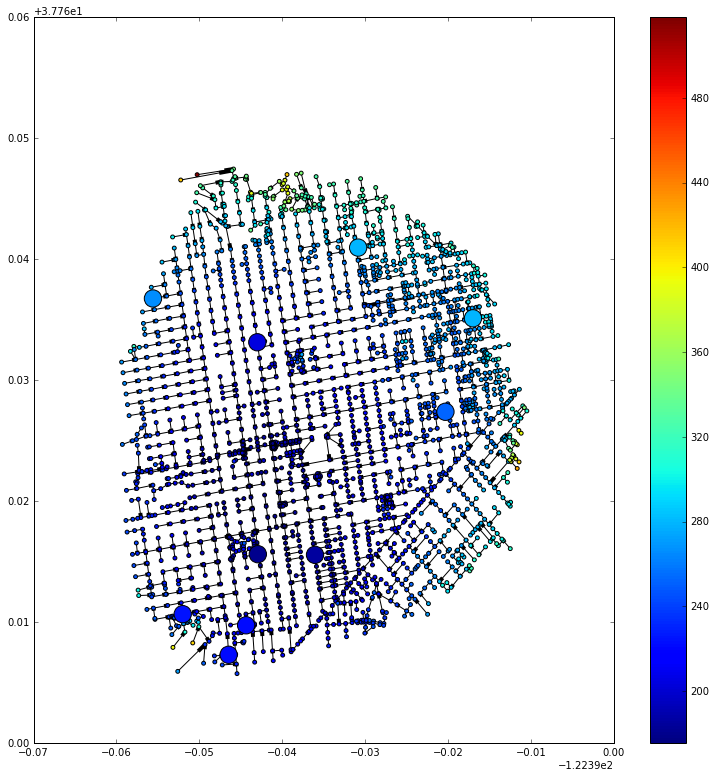

In [8]:
sf_expected_cost, sf_edgelist = random_termination.random_termination_single_cost_edgelist_continuous_call_probability(
    central_sf, 
    sf_cost, 
    1.0/360.0)
plt.figure(figsize=(13,13))
am = nx.draw_networkx_nodes(
    central_sf,
    pos=nx.get_node_attributes(sf, 'pos'),
    node_color=[sf_cost[n] for n in not_caller],
    with_labels=False,
    nodelist=not_caller,
    node_size=15,
    vmin=min(sf_cost.values()),
    vmax=max(sf_cost.values()))
am = nx.draw_networkx_nodes(
    central_sf,
    pos=nx.get_node_attributes(sf, 'pos'),
    node_color=[sf_cost[n] for n in central_sf_caller_locations],
    with_labels=False,
    nodelist=central_sf_caller_locations,
    node_size=300,
    vmin=min(sf_cost.values()),
    vmax=max(sf_cost.values()))
nx.draw_networkx_edges(
    central_sf,
    pos=nx.get_node_attributes(central_sf, 'pos'),
    arrows=True,
    edgelist=sf_edgelist,
    edge_color="black")
plt.colorbar(am)